In [260]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [261]:
# Set parameters
a,b,c = 0.30,1,-5

In [262]:
# Load all data
τ2_rejection = np.loadtxt("./data/%.6f_%.6f_%.6f_simpleTruncexpon_rejection.dat"%(a,b,c))[20000:]
τ2_direct = np.loadtxt("./data/%.6f_%.6f_%.6f_simpleTruncexpon_direct.dat"%(a,b,c))[20000:]

In [263]:
def P(τ,a,b,c):
    Z = 1.0 - np.exp(-c*(b-a))
    return (1/Z)*c*np.exp(-c*(τ-a));

def P_times_tau(τ,a,b,c):
    Z = 1.0 - np.exp(-c*(b-a))
    return τ*(1/Z)*c*np.exp(-c*(τ-a));

In [264]:
τ_fit = np.linspace(a,b,1000)

### Compute average time from exact and sampled distributions

In [265]:
# Compute "exact" average of time
τ_mean_exact = integrate.quad(P_times_tau,a,b,args=(a,b,c))
τ_mean_exact

(0.82179636148046, 9.123772420687848e-15)

In [266]:
# Compute average time from histogram
τ2_counts, τ2_edges = np.histogram(τ2_rejection,bins=1000)
τ2_probs = np.divide(τ2_counts,np.sum(τ2_counts))

τ_mean_rejection = np.sum(τ2_probs*τ2_edges[:-1])
print("Average sampled time with rejection: ",τ_mean_rejection)

Average sampled time with rejection:  0.8215246333751142


In [267]:
# Compute average time from histogram
τ2_counts, τ2_edges = np.histogram(τ2_direct,bins=1000)
τ2_probs = np.divide(τ2_counts,np.sum(τ2_counts))

τ_mean_direct = np.sum(τ2_probs*τ2_edges[:-1])
print("Average sampled time with direct: ",np.sum(τ2_probs*τ2_edges[:-1]))

Average sampled time with direct:  0.8212049387249849


In [268]:
rejection_error = np.abs((τ_mean_exact - τ_mean_rejection) / τ_mean_exact)[0]
direct_error = np.abs((τ_mean_exact - τ_mean_direct) / τ_mean_exact)[0]

print("Rejection Error: %.6f"%(rejection_error))
print("Direct Error: %.6f"%(direct_error))

Rejection Error: 0.000331
Direct Error: 0.000720


### Rejection sampling $\tau$ from simple exponential distribution

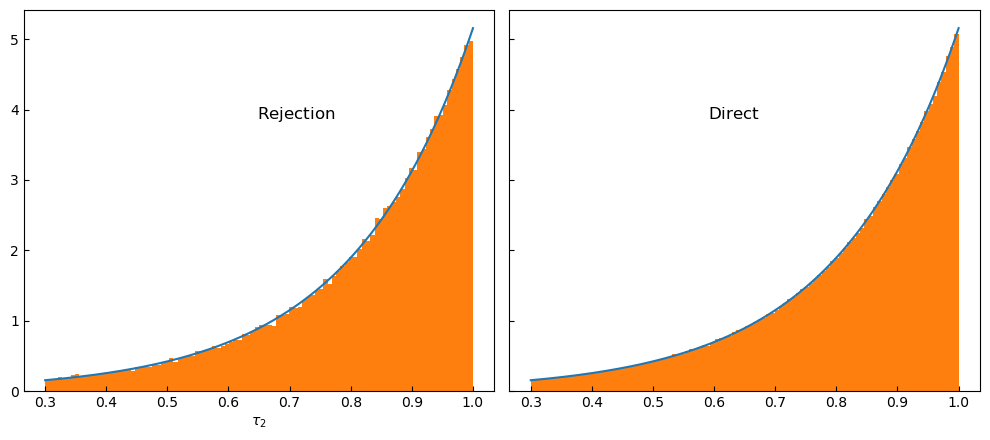

In [269]:
fig,ax = plt.subplots(1,2,figsize=(10,4.5), dpi=100,sharey=True,tight_layout=True);
plt.subplots_adjust(wspace=0.02);


ax[0].plot(τ_fit,P(τ_fit,a,b,c))
ax[0].hist(τ2_rejection, density=True, bins=100,label=r'$\rm{Rejection}$');  # density=False would make counts
ax[0].set_xlabel(r'$\tau_2$');
ax[0].tick_params(direction='in')
ax[0].annotate(r"$\rm{Rejection}$",(0.20+0.06,0.58+0.15),
                xycoords='figure fraction',fontsize=12)


ax[1].plot(τ_fit,P(τ_fit,a,b,c))
ax[1].hist(τ2_direct, density=True, bins=100,label=r'$\rm{Direct}$');  # density=False would make counts
# ax[1].legend(frameon=False);
ax[1].tick_params(direction='in')
ax[1].annotate(r"$\rm{Direct}$",(0.655+0.06,0.58+0.15),
                xycoords='figure fraction',fontsize=12);

In [270]:
# Check normalization
integrate.quad(P,a,b,args=(a,b,c))

(1.0000000000000002, 1.1102230246251569e-14)